<a href="https://colab.research.google.com/github/inggitrestuillahi/Project-Base-Ensemble---Boosting-/blob/main/Project_Based_Tipe3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Based Machine Learning Tipe 3**

 **Fikri Maulana 			1301200239**

 **Rangga Eka Permana 		1301200307**

 **Adhyasta Naufal Faadhilah 	1301200321**

 **Inggit Restu Illahi 		1301204446**

Pengunduhan file "german_credit.csv"

In [ ]:
!gdown "1fN9d4jR4OWx-m0MpgmR0AuG9Bw609TBw"
!gdown --id 1H2k2OZngVCYplHnrpBhldG2og210qMzA

Downloading...
From: https://drive.google.com/uc?id=1fN9d4jR4OWx-m0MpgmR0AuG9Bw609TBw
To: /content/german_credit.csv
100% 277k/277k [00:00<00:00, 66.8MB/s]
/usr/local/lib/python3.8/dist-packages/gdown/cli.py:127: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1H2k2OZngVCYplHnrpBhldG2og210qMzA
To: /content/autos_mpg.csv
100% 18.1k/18.1k [00:00<00:00, 23.8MB/s]


import library yang akan digunakan

In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn import datasets
from sklearn import metrics
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# **Eksplorasi Data**

Menggunakan panda untuk membaca file "german_credit.csv"

In [ ]:
df = pd.read_csv('german_credit.csv',sep=';')
df

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,no checking account,18,all credits at this bank paid back duly,car (used),1049,unknown/no savings account,< 1 yr,< 20,female : non-single or male : single,none,...,car or other,21,none,for free,1,skilled employee/official,0 to 2,no,no,good
1,no checking account,9,all credits at this bank paid back duly,others,2799,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,36,none,for free,03-Feb,skilled employee/official,3 or more,no,no,good
2,... < 0 DM,12,no credits taken/all credits paid back duly,retraining,841,... < 100 DM,4 <= ... < 7 yrs,25 <= ... < 35,female : non-single or male : single,none,...,unknown / no property,23,none,for free,1,unskilled - resident,0 to 2,no,no,good
3,no checking account,12,all credits at this bank paid back duly,others,2122,unknown/no savings account,1 <= ... < 4 yrs,20 <= ... < 25,male : married/widowed,none,...,unknown / no property,39,none,for free,03-Feb,unskilled - resident,3 or more,no,yes,good
4,no checking account,12,all credits at this bank paid back duly,others,2171,unknown/no savings account,1 <= ... < 4 yrs,< 20,male : married/widowed,none,...,car or other,38,bank,rent,03-Feb,unskilled - resident,0 to 2,no,yes,good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,no checking account,24,no credits taken/all credits paid back duly,furniture/equipment,1987,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,21,none,for free,1,unskilled - resident,3 or more,no,no,bad
996,no checking account,24,no credits taken/all credits paid back duly,others,2303,unknown/no savings account,>= 7 yrs,< 20,male : married/widowed,co-applicant,...,unknown / no property,45,none,rent,1,skilled employee/official,0 to 2,no,no,bad
997,... >= 200 DM / salary for at least 1 year,21,all credits at this bank paid back duly,others,12680,... >= 1000 DM,>= 7 yrs,< 20,male : married/widowed,none,...,real estate,30,none,own,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,bad
998,... < 0 DM,12,no credits taken/all credits paid back duly,furniture/equipment,6468,... >= 1000 DM,unemployed,25 <= ... < 35,male : married/widowed,none,...,real estate,52,none,rent,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,bad


Melihat tipe data dari setiap kolom

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   status                   1000 non-null   object
 1   duration                 1000 non-null   int64 
 2   credit_history           1000 non-null   object
 3   purpose                  1000 non-null   object
 4   amount                   1000 non-null   int64 
 5   savings                  1000 non-null   object
 6   employment_duration      1000 non-null   object
 7   installment_rate         1000 non-null   object
 8   personal_status_sex      1000 non-null   object
 9   other_debtors            1000 non-null   object
 10  present_residence        1000 non-null   object
 11  property                 1000 non-null   object
 12  age                      1000 non-null   int64 
 13  other_installment_plans  1000 non-null   object
 14  housing                  1000 non-null   

ringkaswan statistik secara deskriptif

In [ ]:
df.describe()

,duration,amount,age
count,1000.000000,1000.00000,1000.00000
mean,20.903000,3271.24800,35.54200
std,12.058814,2822.75176,11.35267
min,4.000000,250.00000,19.00000
25%,12.000000,1365.50000,27.00000
50%,18.000000,2319.50000,33.00000
75%,24.000000,3972.25000,42.00000
max,72.000000,18424.00000,75.00000


menghitung koefisien korelasi antar kolom

In [ ]:
df.corr()

,duration,amount,age
duration,1.000000,0.624988,-0.037550
amount,0.624988,1.000000,0.032273
age,-0.037550,0.032273,1.000000


menghitung nilai unik pada data frame

In [ ]:
def unique_value(data_set, column_name):
    return data_set[column_name].nunique()

print("Number of the Unique Values:")
print(unique_value(df,list(df.columns)))

Number of the Unique Values:
status                       4
duration                    33
credit_history               5
purpose                     10
amount                     923
savings                      5
employment_duration          5
installment_rate             4
personal_status_sex          4
other_debtors                3
present_residence            4
property                     4
age                         53
other_installment_plans      3
housing                      3
number_credits               4
job                          4
people_liable                2
telephone                    2
foreign_worker               2
credit_risk                  2
dtype: int64


menampilkan tabel yang berisi jumlah dan persentase data yang hilang

In [ ]:
def missing_value_table(df):
    missing_value = df.isna().sum().sort_values(ascending=False)
    missing_value_percent = 100 * df.isna().sum()//len(df)
    missing_value_table = pd.concat([missing_value, missing_value_percent], axis=1)
    missing_value_table_return = missing_value_table.rename(columns = {0 : 'Missing Values', 1 : '% Value'})
    cm = sns.light_palette("lightgreen", as_cmap=True)
    missing_value_table_return = missing_value_table_return.style.background_gradient(cmap=cm)
    return missing_value_table_return
  
missing_value_table(df)

,Missing Values,% Value
status,0,0
property,0,0
foreign_worker,0,0
telephone,0,0
people_liable,0,0
job,0,0
number_credits,0,0
housing,0,0
other_installment_plans,0,0
age,0,0


menampilkan cross-tabulation table

In [ ]:
pd.crosstab(df["personal_status_sex"],df["credit_risk"])

credit_risk,bad,good
personal_status_sex,,
female : non-single or male : single,109,201
female : single,25,67
male : divorced/separated,20,30
male : married/widowed,146,402


In [ ]:
pd.crosstab(df["age"],df["credit_risk"])

credit_risk,bad,good
age,,
19,1,1
20,5,9
21,5,9
22,11,16
23,20,28
24,20,25
25,18,22
26,14,35
27,13,37


In [ ]:
pd.crosstab(df["duration"],df["credit_risk"])

credit_risk,bad,good
duration,,
4,0,6
5,0,1
6,9,66
7,0,5
8,1,6
9,14,35
10,3,25
11,0,9
12,49,130


In [ ]:
df.head(2)

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,no checking account,18,all credits at this bank paid back duly,car (used),1049,unknown/no savings account,< 1 yr,< 20,female : non-single or male : single,none,...,car or other,21,none,for free,1,skilled employee/official,0 to 2,no,no,good
1,no checking account,9,all credits at this bank paid back duly,others,2799,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,36,none,for free,03-Feb,skilled employee/official,3 or more,no,no,good


Uji normalitas untuk menguji apakah suatu distribusi data berasal dari distribusi normal atau tidak

In [ ]:
from scipy import stats

df1 = df.copy()

df1 = df1[["amount","purpose"]]

group = pd.unique(df1.purpose.values)

d_v1 = {grp:df1["amount"][df1.purpose == grp] for grp in group}


Uji levene untuk menguji homogenitas pada sampel

In [ ]:
# Applying levene
stats.levene(d_v1['car (used)'],d_v1['others'],d_v1['retraining'],d_v1['furniture/equipment'],d_v1['car (new)'],d_v1['repairs'])

LeveneResult(statistic=7.672164686183441, pvalue=4.420140163447963e-07)

Uji ANOVA untuk menguji apakah rata rata dari beberapa sampel sama atau tidak

In [ ]:
f, p = stats.f_oneway(d_v1['car (used)'],d_v1['others'],d_v1['retraining'],d_v1['furniture/equipment'],d_v1['car (new)'],d_v1['repairs'])

("F statistics: "+str(f)+" | P value : "+str(p))

'F statistics: 21.49470246525228 | P value : 2.084660929837063e-20'

Menghitung persentase total nilai pada kolom "amount" berdasarkan nilai-nilai pada kolom "purpose" 

In [ ]:
(df.groupby(by=["purpose"])[["amount"]].agg("sum") / df["amount"].sum())*100

,amount
purpose,
business,3.011450
car (new),16.908929
car (used),16.969793
domestic appliances,1.834713
furniture/equipment,21.293158
others,21.909987
radio/television,0.549515
repairs,4.861142
retraining,12.329545


# **Data Classification**

Plot distribusi data untuk mengetahui karakteristik data dari kolom age, amount, dan duration

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

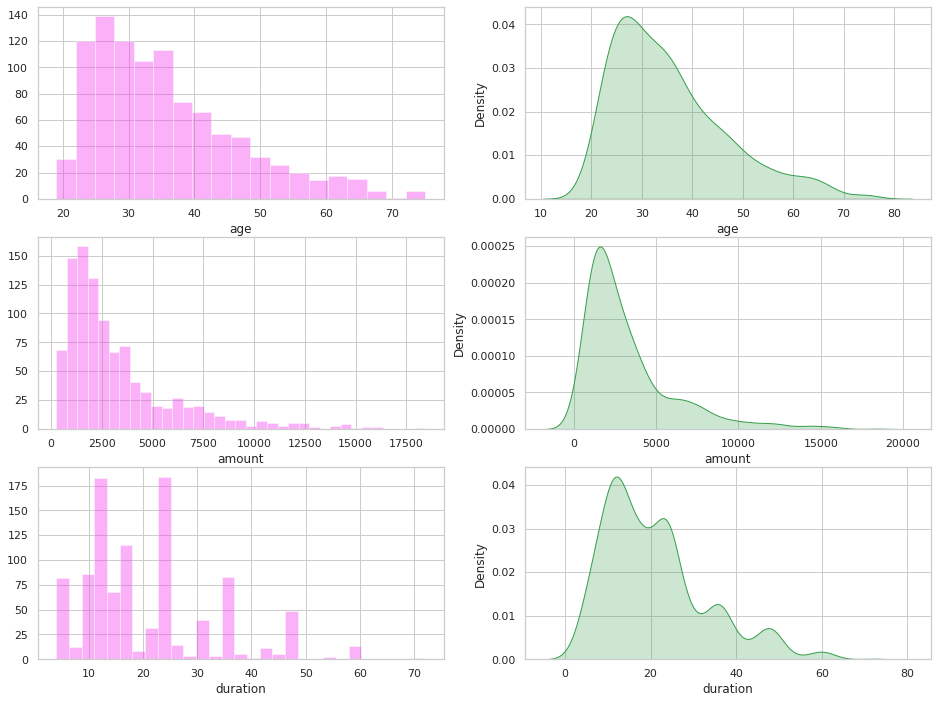

In [ ]:
sns.set(font_scale=1,style="whitegrid")
fig,ax=plt.subplots(ncols=2,nrows=3,figsize=(16,12))
cat_list=["age","amount","duration"]
count=0
for i in range(3):
    sns.distplot(df[cat_list[count]],ax=ax[i][0],kde=False,color="#F43EEC")
    sns.kdeplot(df[cat_list[count]],ax=ax[i][1],shade=True,color="#359F4B")
    count+=1

Menambahkan kolom "monthly_pay" dan kolom "amount^2"

In [ ]:
df["monthly_pay"] = (df["amount"] / df["duration"])
df["amount^2"] = df["amount"]**2

Menambahkan kolom "cat_age" yang berisi kategori umur dari kolom "age"

In [ ]:
df.insert(1,"cat_age",np.NaN)
df.loc[df["age"]<25,"cat_age"]="0-25"
df.loc[((df["age"]>=25) & (df["age"]<30)),"cat_age"]="25-30"
df.loc[((df["age"]>=30) & (df["age"]<35)),"cat_age"]="30-35"
df.loc[((df["age"]>=35) & (df["age"]<40)),"cat_age"]="35-40"
df.loc[((df["age"]>=40) & (df["age"]<50)),"cat_age"]="40-50"
df.loc[((df["age"]>=50) & (df["age"]<76)),"cat_age"]="50-75"

Menambahkan kolom "cat_duration" yang berisi kategori durasi dari kolom "duration"

In [ ]:
df.insert(9,"cat_duration",df["duration"])
for i in df["cat_duration"]:
    if i<12:
        df["cat_duration"]=df["cat_duration"].replace(i,"0-12")
    elif (i>=12) and (i<24):
        df["cat_duration"]=df["cat_duration"].replace(i,"12-24")
    elif (i>=24) and (i<36):
        df["cat_duration"]=df["cat_duration"].replace(i,"24-36")
    elif (i>=36) and (i<48):
        df["cat_duration"]=df["cat_duration"].replace(i,"36-48")
    elif (i>=48) and (i<60):
        df["cat_duration"]=df["cat_duration"].replace(i,"48-60")
    elif (i>=60) and (i<=72):
        df["cat_duration"]=df["cat_duration"].replace(i,"60-72")

Menambahkan kolom "cat_job" yang berisi kategori pekerjaan dari kolom "job"

In [ ]:
df.insert(4,"cat_job",df["job"])
df["cat_job"]=df["cat_job"].astype("category")
df["cat_job"]=df["cat_job"].replace(0,"unskilled")
df["cat_job"]=df["cat_job"].replace(1,"resident")
df["cat_job"]=df["cat_job"].replace(2,"skilled")
df["cat_job"]=df["cat_job"].replace(3,"highly skilled")

Mengubah tipe data pada kolom "job", "cat_age", "cat_duration"

In [ ]:
df["job"]=pd.Categorical(df["job"],categories=[0,1,2,3],ordered=True)
df["cat_age"]=pd.Categorical(df["cat_age"],categories=['0-25','25-30', '30-35','35-40','40-50','50-75'])
df["cat_duration"]=pd.Categorical(df["cat_duration"],categories=['0-12','12-24', '24-36','36-48','48-60','60-72'])

In [ ]:
df

,status,cat_age,duration,credit_history,cat_job,purpose,amount,savings,employment_duration,installment_rate,...,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk,monthly_pay,amount^2
0,no checking account,0-25,18,all credits at this bank paid back duly,skilled employee/official,car (used),1049,unknown/no savings account,< 1 yr,< 20,...,none,for free,1,NaN,0 to 2,no,no,good,58.277778,1100401
1,no checking account,35-40,9,all credits at this bank paid back duly,skilled employee/official,others,2799,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,...,none,for free,03-Feb,NaN,3 or more,no,no,good,311.000000,7834401
2,... < 0 DM,0-25,12,no credits taken/all credits paid back duly,unskilled - resident,retraining,841,... < 100 DM,4 <= ... < 7 yrs,25 <= ... < 35,...,none,for free,1,NaN,0 to 2,no,no,good,70.083333,707281
3,no checking account,35-40,12,all credits at this bank paid back duly,unskilled - resident,others,2122,unknown/no savings account,1 <= ... < 4 yrs,20 <= ... < 25,...,none,for free,03-Feb,NaN,3 or more,no,yes,good,176.833333,4502884
4,no checking account,35-40,12,all credits at this bank paid back duly,unskilled - resident,others,2171,unknown/no savings account,1 <= ... < 4 yrs,< 20,...,bank,rent,03-Feb,NaN,0 to 2,no,yes,good,180.916667,4713241
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,no checking account,0-25,24,no credits taken/all credits paid back duly,unskilled - resident,furniture/equipment,1987,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,...,none,for free,1,NaN,3 or more,no,no,bad,82.791667,3948169
996,no checking account,40-50,24,no credits taken/all credits paid back duly,skilled employee/official,others,2303,unknown/no savings account,>= 7 yrs,< 20,...,none,rent,1,NaN,0 to 2,no,no,bad,95.958333,5303809
997,... >= 200 DM / salary for at least 1 year,30-35,21,all credits at this bank paid back duly,manager/self-empl./highly qualif. employee,others,12680,... >= 1000 DM,>= 7 yrs,< 20,...,none,own,1,NaN,0 to 2,yes (under customer name),no,bad,603.809524,160782400
998,... < 0 DM,50-75,12,no credits taken/all credits paid back duly,manager/self-empl./highly qualif. employee,furniture/equipment,6468,... >= 1000 DM,unemployed,25 <= ... < 35,...,none,rent,1,NaN,0 to 2,yes (under customer name),no,bad,539.000000,41835024


# **Data Visualization**

Memvisualisasikan kolom "credit_risk" dalam bentuk pie chart

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


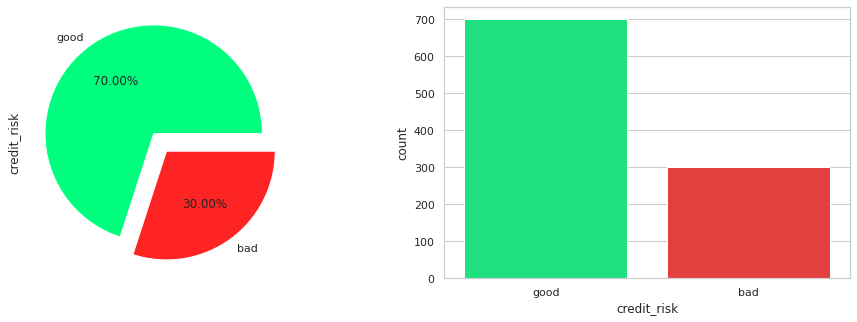

In [ ]:
fig,ax=plt.subplots(ncols=2,figsize=(16,5))
df["credit_risk"].value_counts().plot.pie(autopct="%.2f%%",colors=['#00FF7F','#FF2424'],explode = (0.1, 0.1),ax=ax[0])
sns.countplot(df["credit_risk"],ax=ax[1],palette=['#00FF7F','#FF2424'])

Memvisualisasikan distribusi data dari "cat_age", "personal_status_sex", "cat_job", "housing", "cat_duration", "purpose" dalam bentuk bar plot

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


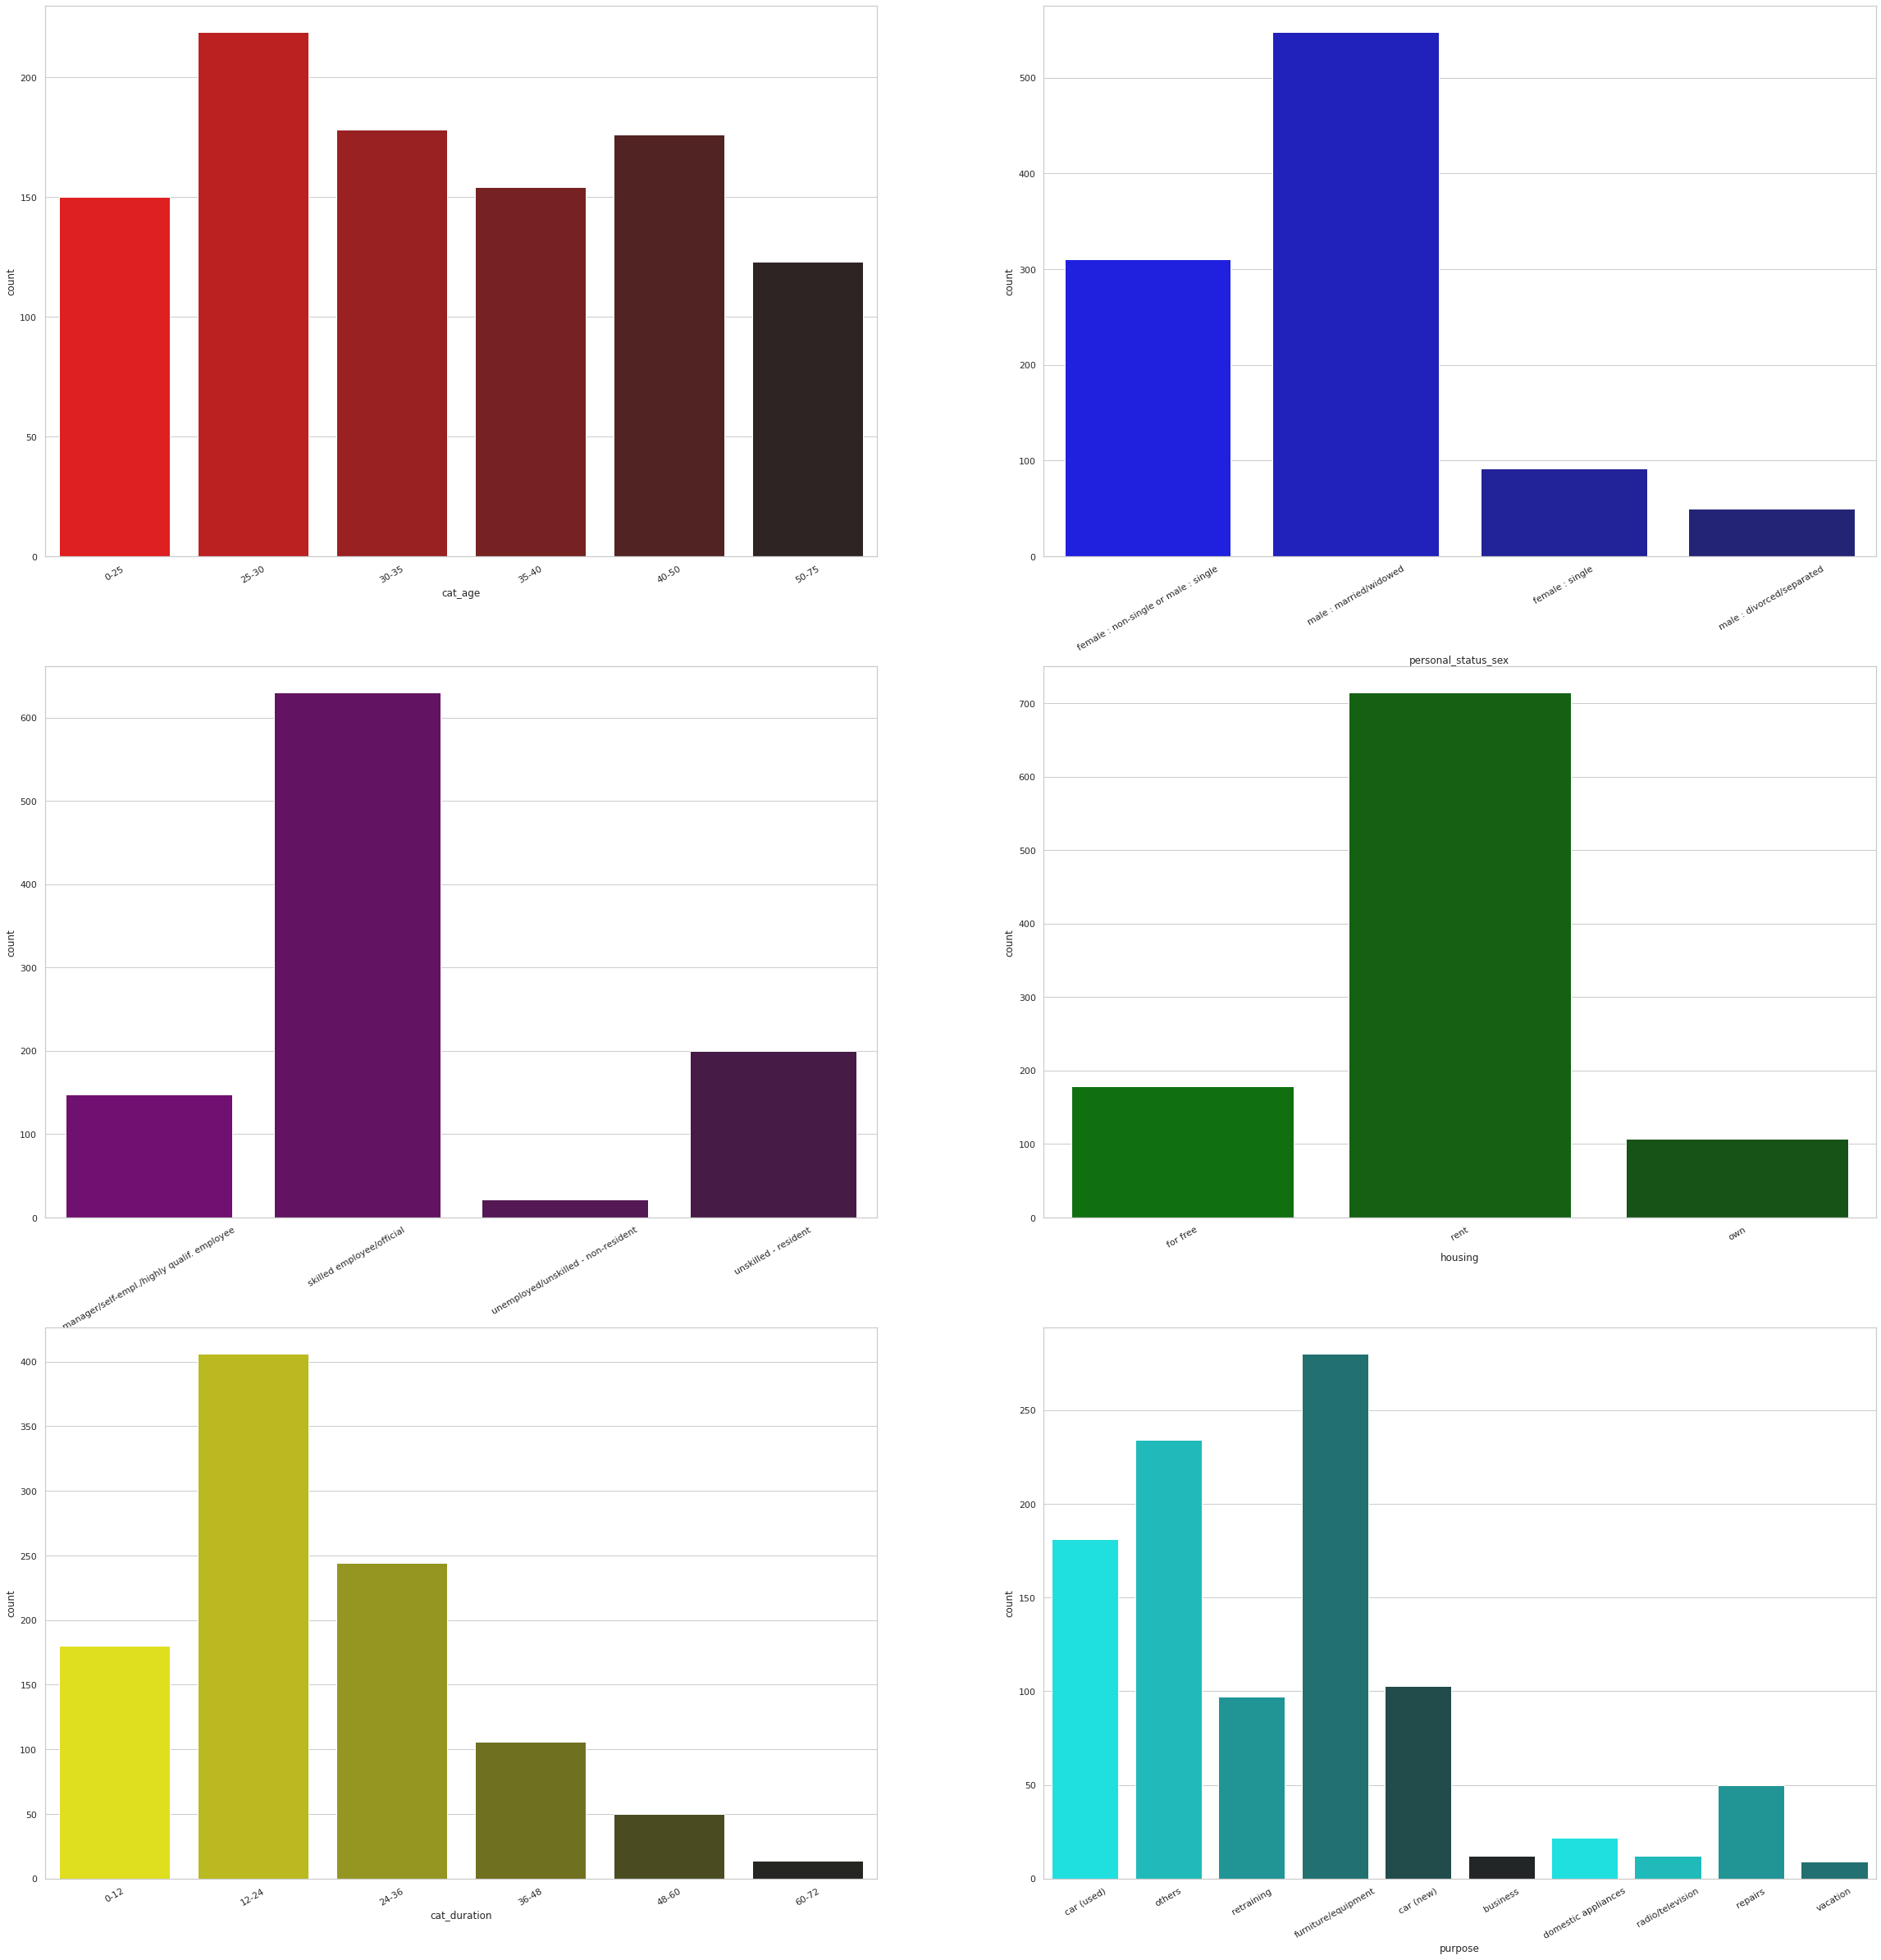

In [ ]:
fig,ax=plt.subplots(ncols=2,nrows=3,figsize=(40,42))
cat_list=["cat_age","personal_status_sex","cat_job","housing","cat_duration","purpose"]
palette=["red","blue","purple","green","yellow","cyan"]
count=0
for i in range(3):
    for j in range(2):
        sns.countplot(df[cat_list[count]],ax=ax[i][j],palette=sns.dark_palette(palette[count],reverse=True))
        ax[i][j].set_xticklabels(ax[i][j].get_xticklabels(),rotation=30)
        count+=1

Memvisualisasikan distribusi data pada kolom "personal_status_sex" dan "credit_risk" dalam bentuk bar plot

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


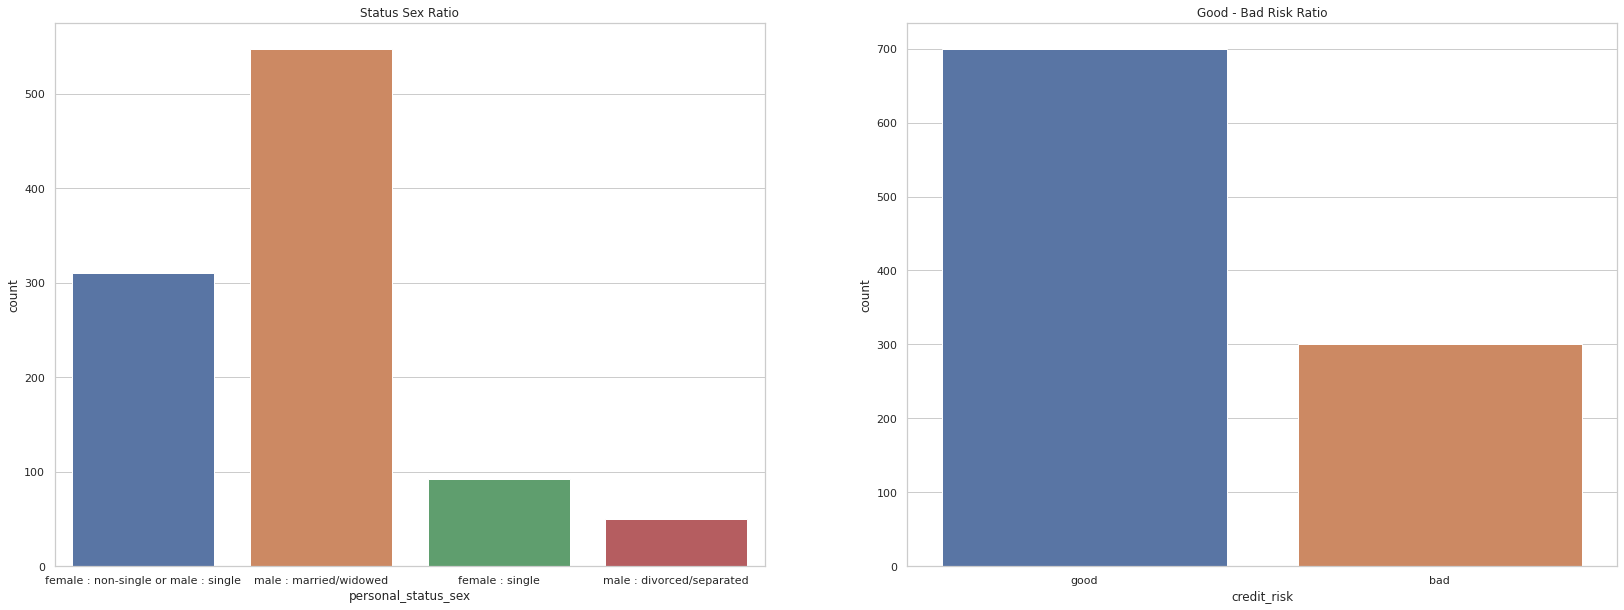

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(28,10))

sns.countplot(df['personal_status_sex'], ax=ax[0]).set_title('Status Sex Ratio');
sns.countplot(df.credit_risk, ax=ax[1]).set_title('Good - Bad Risk Ratio');

Memvisualisasikan hubungan antara kolom "housing" dan "credit_risk" dalam bentuk bar plot

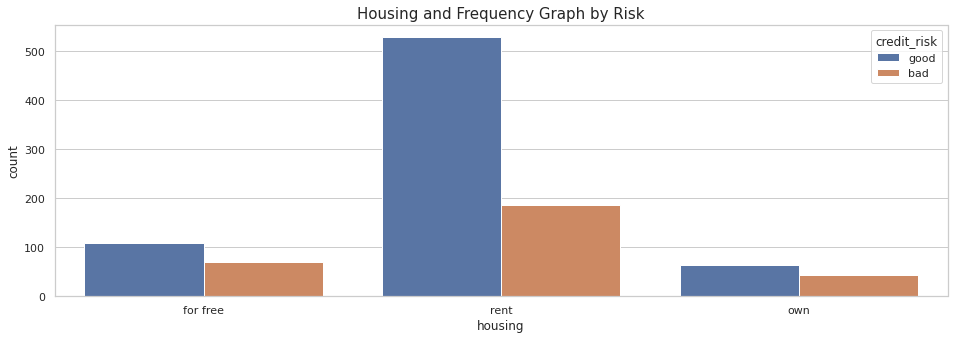

In [ ]:
plt.figure(figsize=(16,5))
sns.countplot(x="housing", hue="credit_risk", data=df).set_title("Housing and Frequency Graph by Risk", fontsize=15);
plt.show()

Memvisualisasikan hubungan antara kolom "personal_status_sex", "age", dan "cat_job" dalam bentuk bar plot

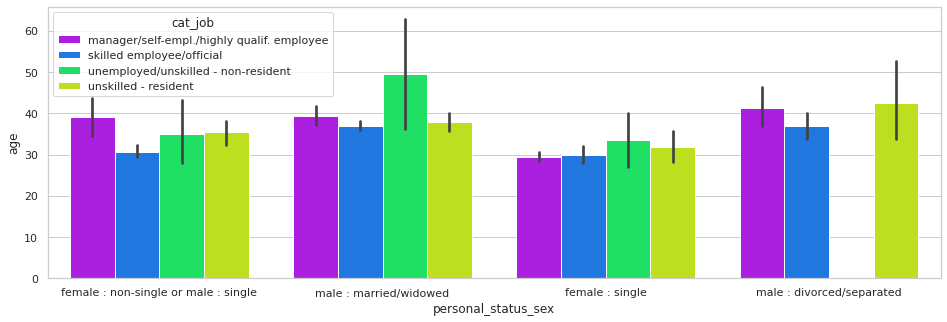

In [ ]:
plt.figure(figsize=(16,5))
sns.barplot(data=df,x="personal_status_sex",y="age",hue="cat_job",palette="hsv_r")

Memvisualisasikan hubungan antara kolom "cat_age" dan "amount" dalam bentuk scatter plot

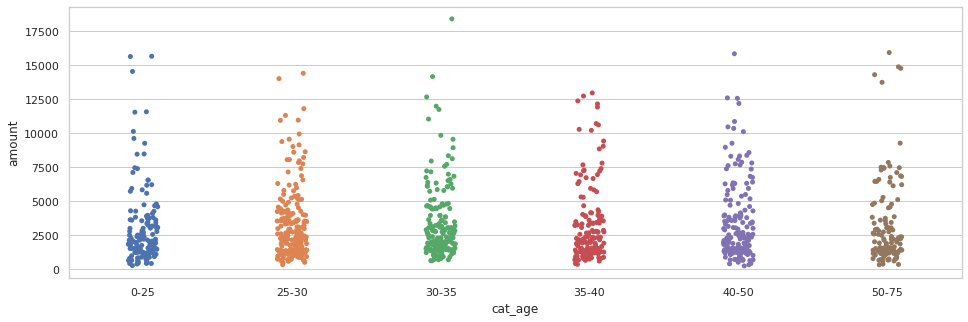

In [ ]:
plt.figure(figsize = (16, 5))
sns.stripplot(x = "cat_age", y = "amount", data = df)

Memvisualisasikan antara "age", "amount", "duration", dan "personal_status_sex" dalam bentuk line plot dengan warna yang diatur oleh kolom "personal_status_sex"

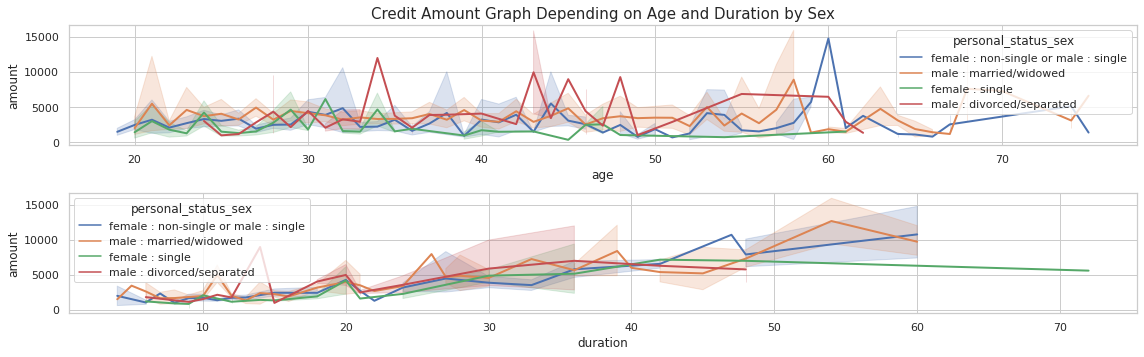

In [ ]:
fig, ax = plt.subplots(2,1,figsize=(16,5))
plt.tight_layout(2)
sns.lineplot(data=df, x='age', y='amount', hue='personal_status_sex', lw=2, ax=ax[0]).set_title("Credit Amount Graph Depending on Age and Duration by Sex", fontsize=15);
sns.lineplot(data=df, x='duration', y='amount', hue='personal_status_sex', lw=2, ax=ax[1]);

Memvisualisasikan hubungan antara kolom "cat_age", "amount", "credit_risk", dan "personal_status_sex" dalam bentuk point plot dengan warna yang diatur oleh kolom "personal_status_sex"

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:675: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


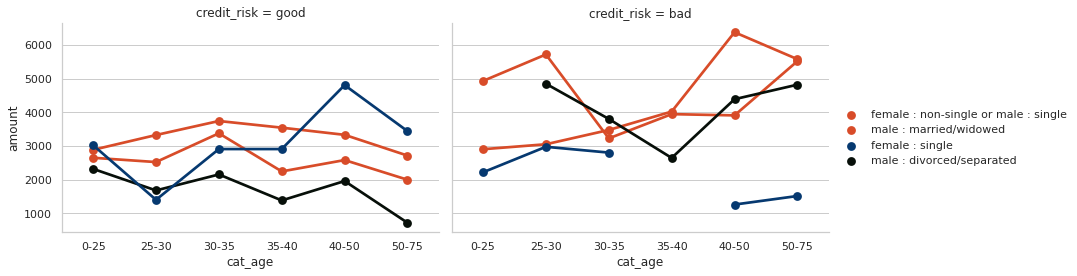

In [ ]:
sns.FacetGrid(data=df,col="credit_risk",aspect=1.5,height=4).map(sns.pointplot,"cat_age","amount","personal_status_sex",palette=["#d84c29","#d84c29","#070f09","#063970"],ci=None).add_legend();

Memvisualisasikan korelasi semua kolom data frame dalam bentuk heatmap

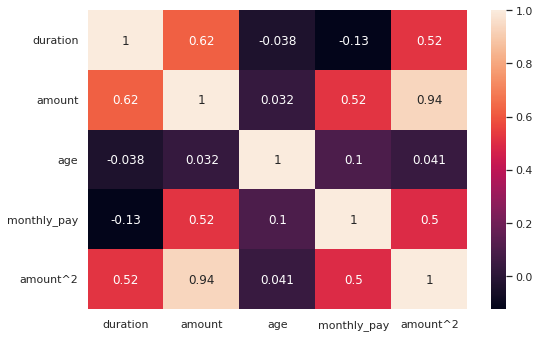

In [ ]:
plt.figure(figsize=(8.5,5.5))
corr = sns.heatmap(df.corr(),xticklabels=df.corr().columns,yticklabels=df.corr().columns,annot=True)

# **Data Preprocessing**

Mengubah nama kolom age, duration, dan job menjadi cat_age, cat_duration, dan cat_job dan menghapus kolom

In [ ]:
df["age"],df["duration"],df["Job"]=df["cat_age"],df["cat_duration"],df["cat_job"]
df=df.drop(["cat_age","cat_duration","cat_job"],axis=1)

Menyimpan nama kolom dalam sebuah list dan menghapus beberapa kolom

In [ ]:
liste_columns=list(df.columns)
liste_columns.remove("personal_status_sex")
liste_columns.remove("credit_risk")
liste_columns.remove("amount")
liste_columns.remove("monthly_pay")
liste_columns.remove("amount^2")

Mengubah tipe data kolom "personal_status_sex" dan "credit_risk" menjadi tipe data numerik

In [ ]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
df["personal_status_sex"]=label.fit_transform(df["personal_status_sex"])
df["credit_risk"]=label.fit_transform(df["credit_risk"])
df=pd.get_dummies(df,columns=liste_columns,prefix=liste_columns)

Mengubah skala dari data pada kolom "amount", "monthly_pay", dan "amount^2"

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df["amount"]=scaler.fit_transform(df[["amount"]])
df["monthly_pay"]=scaler.fit_transform(df[["monthly_pay"]])
df["amount^2"]=scaler.fit_transform(df[["amount^2"]])

In [ ]:
df.head()

,amount,personal_status_sex,credit_risk,monthly_pay,amount^2,status_... < 0 DM,status_... >= 200 DM / salary for at least 1 year,status_0<= ... < 200 DM,status_no checking account,duration_0-12,...,people_liable_0 to 2,people_liable_3 or more,telephone_no,telephone_yes (under customer name),foreign_worker_no,foreign_worker_yes,Job_manager/self-empl./highly qualif. employee,Job_skilled employee/official,Job_unemployed/unskilled - non-resident,Job_unskilled - resident
0,0.043964,0,1,0.013919,0.003058,0,0,0,1,0,...,1,0,1,0,1,0,0,1,0,0
1,0.140255,3,1,0.116710,0.022900,0,0,0,1,1,...,0,1,1,0,1,0,0,1,0,0
2,0.032519,0,1,0.018721,0.001900,1,0,0,0,0,...,1,0,1,0,1,0,0,0,0,1
3,0.103004,3,1,0.062140,0.013084,0,0,0,1,0,...,0,1,1,0,0,1,0,0,0,1
4,0.105700,3,1,0.063801,0.013704,0,0,0,1,0,...,1,0,1,0,0,1,0,0,0,1


# **Building Models**

Import package yang akan digunakan selanjutnya

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report

Membagi data ke dalam kelompok data latih dan kelompok data uji atau data splitting

In [ ]:
X=df.drop(["credit_risk"],axis=1)
Y=df["credit_risk"]
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=0)

**GradientBoosting Model 1**

Import package GradientBoostingClassifier

Learning rate = 0.01

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbm_model = GradientBoostingClassifier(learning_rate = 0.01,max_depth = 5,min_samples_split = 10,n_estimators = 100).fit(X_train, Y_train)

Menampilkan akurasi model machine learning yang sudah dibuat

In [ ]:
print("Train Accuracy Score : ",accuracy_score(Y_train,gbm_model.predict(X_train)))
print("Test Accuracy Score : ",accuracy_score(Y_test,gbm_model.predict(X_test)))

Train Accuracy Score :  0.8214285714285714
Test Accuracy Score :  0.7133333333333334


In [ ]:
print(classification_report(Y_test,gbm_model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.82      0.18      0.30       100
           1       0.71      0.98      0.82       200

    accuracy                           0.71       300
   macro avg       0.76      0.58      0.56       300
weighted avg       0.74      0.71      0.65       300



In [ ]:
X_train.shape

(700, 84)

# **Eksperimen**


**GradientBoosting Model 2**

learning_rate = 0.02

In [ ]:
gbm_model = GradientBoostingClassifier(learning_rate = 0.02,max_depth = 5,min_samples_split = 10,n_estimators = 100).fit(X_train, Y_train)

In [ ]:
print("Train Accuracy Score : ",accuracy_score(Y_train,gbm_model.predict(X_train)))
print("Test Accuracy Score : ",accuracy_score(Y_test,gbm_model.predict(X_test)))

Train Accuracy Score :  0.8985714285714286
Test Accuracy Score :  0.7433333333333333


In [ ]:
print(classification_report(Y_test,gbm_model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.81      0.30      0.44       100
           1       0.73      0.96      0.83       200

    accuracy                           0.74       300
   macro avg       0.77      0.63      0.64       300
weighted avg       0.76      0.74      0.70       300



**GradientBoosting Model 3**

Learning_rate = 0.03

In [ ]:
gbm_model = GradientBoostingClassifier(learning_rate = 0.03,max_depth = 5,min_samples_split = 10,n_estimators = 100).fit(X_train, Y_train)

In [ ]:
print("Train Accuracy Score : ",accuracy_score(Y_train,gbm_model.predict(X_train)))
print("Test Accuracy Score : ",accuracy_score(Y_test,gbm_model.predict(X_test)))

Train Accuracy Score :  0.9314285714285714
Test Accuracy Score :  0.75


In [ ]:
print(classification_report(Y_test,gbm_model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.74      0.39      0.51       100
           1       0.75      0.93      0.83       200

    accuracy                           0.75       300
   macro avg       0.74      0.66      0.67       300
weighted avg       0.75      0.75      0.72       300



# **Kesimpulan**

**Setelah kita lakukan eksplorasi data, preprocessing data dan pembuatan model kita mendapatkan akurasi yang cukup tinggi. Akurasi yang tinggi dapat diatur pada bagian learning rate di GradientBoostingClassifier, karena pada eksperimen yang telah kita lakukan bisa dilihat persentase akurasi meningkat berbanding lurus dengan nilai learning_rate yang diatur**